In [1]:
import pandas as pd ##data manipulation


In [15]:
dump = pd.read_csv("dump-count-patents.csv")

In [16]:
dump

,publication_date,term_count
0,20220112,65
1,20080213,4
2,19970404,8
3,20080327,4
4,20010321,1
...,...,...
7303,20200717,341
7304,19901127,11
7305,19910417,6
7306,20110322,3


In [19]:
dump['publication_date']= pd.to_datetime(dump['publication_date'],format='%Y%m%d')
dump['term_count'] = pd.to_numeric(dump['term_count'])

In [20]:
dump

,publication_date,term_count
0,2022-01-12,65
1,2008-02-13,4
2,1997-04-04,8
3,2008-03-27,4
4,2001-03-21,1
...,...,...
7303,2020-07-17,341
7304,1990-11-27,11
7305,1991-04-17,6
7306,2011-03-22,3


In [21]:
total_term_count = dump['term_count'].sum()
print(f'The total term count is: {total_term_count}')

The total term count is: 319364


In [23]:
dump['publication_year'] = dump['publication_date'].dt.year

# Group by 'publication_year' and calculate the sum of 'term_count' for each year
grouped_df = dump.groupby('publication_year')['term_count'].sum().reset_index()

grouped_df

,publication_year,term_count
0,1956,1
1,1970,1
2,1976,1
3,1978,1
4,1979,1
5,1981,1
6,1982,1
7,1983,7
8,1984,6
9,1985,3


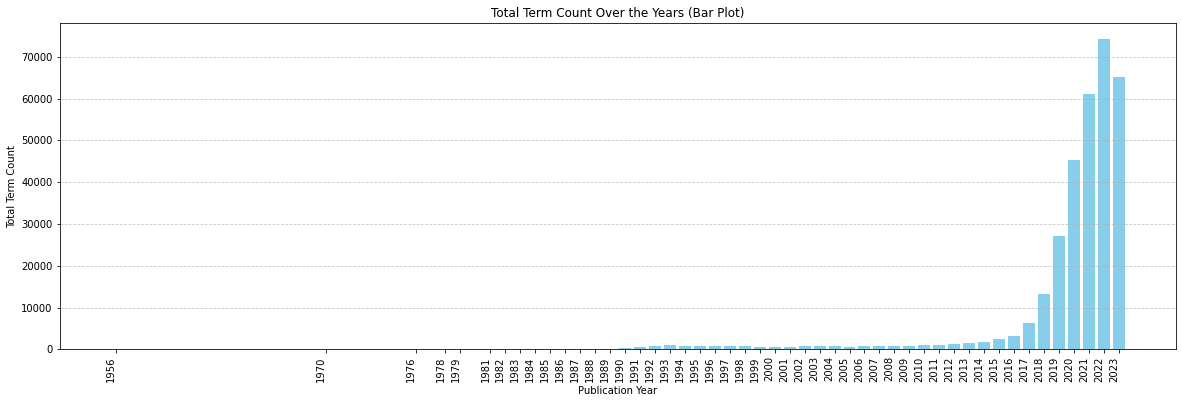

In [47]:
import matplotlib.pyplot as plt

# Assuming grouped_df is your DataFrame with columns 'publication_year' and 'term_count'
plt.figure(figsize=(20, 6))
plt.bar(grouped_df['publication_year'], grouped_df['term_count'], color='skyblue')
plt.title('Total Term Count Over the Years (Bar Plot)')
plt.xlabel('Publication Year')
plt.ylabel('Total Term Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis ticks to all unique years
plt.xticks(grouped_df['publication_year'], rotation=90, ha='right')
plt.show()

In [51]:
all_patents = pd.read_csv("all-patents-count.csv")
all_patents.columns

Index(['publication_date', 'term_count'], dtype='object')

In [52]:
# Assuming all_patents is your DataFrame with columns 'publication_date' and 'term_count'
all_patents['publication_date'] = pd.to_datetime(all_patents['publication_date'], format='%Y%m%d', errors='coerce')
all_patents['term_count'] = pd.to_numeric(all_patents['term_count'], errors='coerce')

# Check for rows with NaT in 'publication_date'
invalid_dates = all_patents[all_patents['publication_date'].isna()]

# Check for rows with NaN in 'term_count'
invalid_term_count = all_patents[all_patents['term_count'].isna()]

# Display rows with invalid values
print("Rows with invalid 'publication_date':")
print(invalid_dates)

print("\nRows with invalid 'term_count':")
print(invalid_term_count)

Rows with invalid 'publication_date':
      publication_date  term_count
31841              NaT     1227916

Rows with invalid 'term_count':
Empty DataFrame
Columns: [publication_date, term_count]
Index: []


In [55]:
all_patents2 = pd.read_csv("all-patents-from-1950.csv")
all_patents2.columns

Index(['publication_date', 'term_count'], dtype='object')

In [56]:
all_patents2['publication_date'] = pd.to_datetime(all_patents2['publication_date'], format='%Y%m%d')
all_patents2['term_count'] = pd.to_numeric(all_patents2['term_count'])

In [57]:
total_all = all_patents2['term_count'].sum()
print(f'The total term count is: {total_all}')

The total term count is: 144174977


In [58]:
all_patents2['publication_year'] = all_patents2['publication_date'].dt.year

# Group by 'publication_year' and calculate the sum of 'term_count' for each year
grouped_all = all_patents2.groupby('publication_year')['term_count'].sum().reset_index()

grouped_all

,publication_year,term_count
0,1950,126802
1,1951,159768
2,1952,176921
3,1953,192167
4,1954,174917
...,...,...
69,2019,6465925
70,2020,7329283
71,2021,8449133
72,2022,8097923


In [78]:
all_patents_unique = pd.read_csv("all-patents-unique.csv")

In [79]:
all_patents_unique['publication_date'] = pd.to_datetime(all_patents_unique['publication_date'], format='%Y%m%d')
all_patents_unique['term_count'] = pd.to_numeric(all_patents_unique['unique_family_count'])
all_patents_unique['publication_year'] = all_patents_unique['publication_date'].dt.year

In [62]:
all_unique_total = all_patents_unique['term_count'].sum()
print(f'The total term count is: {all_unique_total}')

The total term count is: 141024111


In [2]:
total_all#-all_unique_total

NameError: name 'total_all' is not defined

In [81]:
#all_patents_unique

In [64]:
ai_unique = pd.read_csv("ai-count-unique.csv")

In [65]:
ai_unique['publication_date'] = pd.to_datetime(ai_unique['publication_date'], format='%Y%m%d')
ai_unique['term_count'] = pd.to_numeric(ai_unique['unique_family_count'])

In [66]:
ai_unique_total = ai_unique['term_count'].sum()
print(f'The total term count is: {ai_unique_total}')

The total term count is: 25536


In [68]:
ai_unique['publication_year'] = ai_unique['publication_date'].dt.year

# Group by 'publication_year' and calculate the sum of 'term_count' for each year
grouped_ai = ai_unique.groupby('publication_year')['term_count'].sum().reset_index()

grouped_ai

,publication_year,term_count
0,1970,1
1,1976,1
2,1978,1
3,1979,1
4,1981,1
5,1983,3
6,1984,3
7,1985,2
8,1986,5
9,1987,12


In [75]:
all_patents_unique.columns

Index(['publication_date', 'unique_family_count', 'term_count'], dtype='object')

In [73]:
all_unique_total

141024111

In [25]:
filtered_df = dump[dump['publication_year'] <= 2017]

# Calculate the sum of 'term_count' for the filtered DataFrame
total_term_count_until_2017 = filtered_df['term_count'].sum()

print(f'The total term count until 2017 is: {total_term_count_until_2017}')

The total term count until 2017 is: 32796


In [30]:
test2017 = pd.read_csv("test-patents-2017.csv")

In [31]:
test2017['publication_date']= pd.to_datetime(test2017['publication_date'],format='%Y%m%d')
test2017['term_count'] = pd.to_numeric(test2017['term_count'])

In [32]:
total_2017_count = test2017['term_count'].sum()
print(f'The total term count is: {total_2017_count}')

The total term count is: 26218


In [41]:
min2017 = test2017['publication_date'].min()
max2017 = test2017['publication_date'].max()
mintest = filtered_df['publication_date'].min()
maxtest = filtered_df['publication_date'].max()

print(f'min date 2017: {min2017} \n max date 2017: {max2017} \n min test: {mintest}\n max test: {maxtest}')

min date 2017: 1970-12-15 00:00:00 
 max date 2017: 2017-09-13 00:00:00 
 min test: 1956-11-01 00:00:00
 max test: 2017-12-29 00:00:00


In [28]:
## I did a dump of 100 patents mimiking the original query
dump100 = pd.read_json("patent-test-16nov.json")
len(dump100)

100

In [29]:
dump100 = dump100.drop_duplicates('family_id', )
len(dump100)

100

---
## Google Patents
---

In [9]:
%cd ..

/Users/trinidadbosch/Desktop/SEDS/Tesis


In [13]:
patents = pd.read_pickle("Code/master-thesis/tesis/data/patents_ai_20230223.pkl")  

In [14]:
len(patents)

26218

In [14]:
patents.title_localized[5]

array([{'text': 'Adaptive remote maintenance of rolling stocks', 'language': 'en'},
       {'text': 'Адаптивное дистанционное обслуживание подвижных составов', 'language': 'ru'}],
      dtype=object)

In [5]:
patents.head()
## Country code, can do a description of where do they come from, and draw a time series

,publication_number,family_id,title_localized,abstract_localized,publication_date,country_code,filing_date,grant_date
0,RU-2614740-C1,58506776,"[{'text': 'Способ оценки основного параметра, ...",[{'text': 'FIELD: transportation. SUBSTA...,20170329,RU,20151116,20170329
1,KR-100399530-B1,19688746,[],[{'text': 'PURPOSE: A method of recognizing th...,20030926,KR,20000915,20030926
2,KR-100406333-B1,8222388,[],[{'text': 'Each point in the coordinate system...,20040124,KR,19970104,20040124
3,DE-4439961-A1,22529447,[{'text': 'Prozeßsteuereinheit für eine Drucke...,[{'text': 'A lithographic color web printing p...,19950706,DE,19941109,0
4,CN-101694597-A,42093570,"[{'text': '电脑键盘', 'language': 'zh'}]",[{'text': 'The invention discloses a computer ...,20100414,CN,20091023,0


In [15]:
patents['publication_date']= pd.to_datetime(patents['publication_date'],format='%Y%m%d')

In [16]:
min_date = patents["publication_date"].min()
max_date = patents["publication_date"].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 1970-12-15 00:00:00
Maximum Date: 2017-09-13 00:00:00


In [18]:
patents.columns

Index(['publication_number', 'family_id', 'title_localized',
       'abstract_localized', 'publication_date', 'country_code', 'filing_date',
       'grant_date'],
      dtype='object')

In [19]:
date_columns = ['publication_date', 'filing_date', 'grant_date']  # Replace with your actual column names

for column in date_columns:
    patents[column] = pd.to_datetime(patents[column], format='%Y%m%d', errors='coerce')


In [21]:
for column in date_columns:
    patents[f'{column}_year'] = patents[column].dt.year

In [23]:
patents.tail()

,publication_number,family_id,title_localized,abstract_localized,publication_date,country_code,filing_date,grant_date,publication_date_year,filing_date_year,grant_date_year
26213,CN-104615987-A,53150424,"[{'text': '一种基于误差反传神经网络的飞机残骸智能识别方法及系统', 'langu...",[{'text': 'The invention provides a system for...,2015-05-13,CN,2015-02-02,NaT,2015,2015,NaN
26214,CN-106028134-A,57005112,"[{'text': '针对移动计算设备检测体育视频精彩部分', 'language': 'z...",[{'text': 'A solution is provided for detectin...,2016-10-12,CN,2016-03-31,NaT,2016,2016,NaN
26215,CN-1940793-A,37959033,"[{'text': '烧透点集成智能控制系统', 'language': 'zh'}, {'...",[{'text': 'A sintered and integrated intellige...,2007-04-04,CN,2006-02-14,NaT,2007,2006,NaN
26216,CN-204650151-U,54102877,"[{'text': '多路高速脉冲输入时间同步设备', 'language': 'zh'},...",[{'text': 'The utility model discloses a multi...,2015-09-16,CN,2015-02-12,2015-09-16,2015,2015,2015.0
26217,CN-102855219-A,47401814,"[{'text': '基于ann-mc-ud方法的公路桥梁地震易损性分析方法', 'lang...",[{'text': 'The invention relates to a highway ...,2013-01-02,CN,2012-09-13,NaT,2013,2012,NaN


---
## MEDIA

##### https://github.com/codelucas/newspaper/
---

In [15]:
import pandas as pd
from newspaper import Article ##scrape articles
import requests

In [16]:
media = pd.read_csv('mediacloud_test.csv')  
media

,ap_syndicated,collect_date,feeds,guid,language,media_id,media_name,media_url,metadata,processed_stories_id,publish_date,stories_id,story_tags,title,url,word_count
0,False,2023-07-08 09:41:01.733220,NaN,https://biztoc.com/x/01f8741b1fd02055?ref=ff,en,26357,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3061733021,2023-07-08 06:58:35,2707205375,"[{'stories_id': 2707205375, 'tag': 'nyt_labell...",The Rise of GPT COIN: A Promising Project for ...,https://biztoc.com/x/01f8741b1fd02055?ref=ff,NaN
1,False,2023-07-09 11:06:19.214967,NaN,https://www.usatoday.com/story/news/nation/202...,en,4,USA Today,http://www.usatoday.com,"{'date_guess_method': None, 'extractor_version...",3062360716,2023-07-09 10:12:01,2707902789,"[{'stories_id': 2707902789, 'tag': 'geonames_6...",Hollywood on strike: The future of AI in the e...,http://rssfeeds.usatoday.com/~/752278487/0/usa...,NaN
2,False,2023-07-09 18:34:00.383941,NaN,content_64a9b5543f7cfe1bf3401a16,en,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",3062544145,2023-07-09 17:53:59,2708123370,"[{'stories_id': 2708123370, 'tag': 'geonames_6...",AI Will Change Your Work Significantly: Here’s...,https://www.forbes.com/sites/tracybrower/2023/...,NaN
3,False,2023-07-10 08:59:27.351146,NaN,https://www.washingtonpost.com/business/2023/0...,en,2,Washington Post,http://washingtonpost.com,"{'date_guess_method': None, 'extractor_version...",3062926604,2023-07-10 07:00:12,2708560060,"[{'stories_id': 2708560060, 'tag': 'geonames_6...",Employees want ChatGPT at work. Bosses worry t...,https://www.washingtonpost.com/business/2023/0...,NaN
4,False,2023-07-11 11:40:57.349091,NaN,https://www.businessinsider.com/chatgpt-compan...,en,18710,Business Insider,http://www.businessinsider.com,"{'date_guess_method': None, 'extractor_version...",3064017134,2023-07-11 11:38:24,2709766348,"[{'stories_id': 2709766348, 'tag': 'geonames_3...","Amazon, Apple, and 12 other major companies th...",https://www.businessinsider.com/chatgpt-compan...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,False,2023-08-08 10:38:17.646567,NaN,https://www.indystar.com/story/sports/college/...,en,85390,blogs.indystar.com,http://blogs.indystar.com/#spider,"{'date_guess_method': None, 'extractor_version...",3086840967,2023-08-08 10:32:46,2735320322,"[{'stories_id': 2735320322, 'tag': 'geonames_6...",Who are 10 best IU athletes of all time? See h...,http://rssfeeds.indystar.com/~/769297568/0/ind...,NaN
70,False,2023-08-08 11:17:17.099815,NaN,https://biztoc.com/x/4736ab7c47bdf10e?ref=ff,NaN,26357,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3086875057,2023-08-08 10:32:06,2735358383,"[{'stories_id': 2735358383, 'tag': 'readabilit...",Chat GPT,https://biztoc.com/x/4736ab7c47bdf10e?ref=ff,NaN
71,False,2023-08-10 06:50:57.064564,NaN,https://www.businessinsider.com/supermarket-pa...,en,18710,Business Insider,http://www.businessinsider.com,"{'date_guess_method': None, 'extractor_version...",3088466531,2023-08-10 06:45:51,2737150054,"[{'stories_id': 2737150054, 'tag': 'geonames_2...",A supermarket experimented with AI to generate...,https://www.businessinsider.com/supermarket-pa...,NaN
72,False,2023-08-10 08:10:12.328486,NaN,{20C06575-04D4-B545-723C-C2878DD82857},en,1150,Wall Street Journal,https://www.wsj.com/,"{'date_guess_method': None, 'extractor_version...",3088578595,2023-08-10 07:20:00,2737242632,"[{'stories_id': 2737242632, 'tag': 'geonames_6...",Therese Poletti's Tech Tales: ‘Miami is dead. ...,http://www.marketwatch.com/news/story.asp?guid...,NaN


In [17]:
media.head()
#url_list = media['url'].tolist()
#url_list

,ap_syndicated,collect_date,feeds,guid,language,media_id,media_name,media_url,metadata,processed_stories_id,publish_date,stories_id,story_tags,title,url,word_count
0,False,2023-07-08 09:41:01.733220,NaN,https://biztoc.com/x/01f8741b1fd02055?ref=ff,en,26357,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3061733021,2023-07-08 06:58:35,2707205375,"[{'stories_id': 2707205375, 'tag': 'nyt_labell...",The Rise of GPT COIN: A Promising Project for ...,https://biztoc.com/x/01f8741b1fd02055?ref=ff,NaN
1,False,2023-07-09 11:06:19.214967,NaN,https://www.usatoday.com/story/news/nation/202...,en,4,USA Today,http://www.usatoday.com,"{'date_guess_method': None, 'extractor_version...",3062360716,2023-07-09 10:12:01,2707902789,"[{'stories_id': 2707902789, 'tag': 'geonames_6...",Hollywood on strike: The future of AI in the e...,http://rssfeeds.usatoday.com/~/752278487/0/usa...,NaN
2,False,2023-07-09 18:34:00.383941,NaN,content_64a9b5543f7cfe1bf3401a16,en,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",3062544145,2023-07-09 17:53:59,2708123370,"[{'stories_id': 2708123370, 'tag': 'geonames_6...",AI Will Change Your Work Significantly: Here’s...,https://www.forbes.com/sites/tracybrower/2023/...,NaN
3,False,2023-07-10 08:59:27.351146,NaN,https://www.washingtonpost.com/business/2023/0...,en,2,Washington Post,http://washingtonpost.com,"{'date_guess_method': None, 'extractor_version...",3062926604,2023-07-10 07:00:12,2708560060,"[{'stories_id': 2708560060, 'tag': 'geonames_6...",Employees want ChatGPT at work. Bosses worry t...,https://www.washingtonpost.com/business/2023/0...,NaN
4,False,2023-07-11 11:40:57.349091,NaN,https://www.businessinsider.com/chatgpt-compan...,en,18710,Business Insider,http://www.businessinsider.com,"{'date_guess_method': None, 'extractor_version...",3064017134,2023-07-11 11:38:24,2709766348,"[{'stories_id': 2709766348, 'tag': 'geonames_3...","Amazon, Apple, and 12 other major companies th...",https://www.businessinsider.com/chatgpt-compan...,NaN


In [49]:
#mediaoutlet
url3 = media.url[3]
url3

'https://www.washingtonpost.com/business/2023/07/10/chatgpt-safe-company-work-ban-lawyers-code/'

In [22]:
pip install newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13540 sha256=a16557d6562b2cd422a25521b029425623f8492f8e1447ca43b3657b707ecae0
  Stored in directory: /Users/trinidadbosch/Library/Caches/pip/wheels/82/ee/f5/ad0d16b875d38aec7d9e9444c72db99b25eaa722ecfb8df068
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3341 sha256=1f7ffb95d447efe68ae7feb0f7d8be8380a54cf9e5613c0fd71e34cd02cc3f44
  Stored in directory: /Users/trinidadbosch/Li

In [55]:
article.authors

['Taylor Telford', 'Pranshu Verma']

In [56]:
article.text

'Listen 8 min Share Comment on this story Comment\n\nWhen Justin used ChatGPT at work earlier this year, he was pleased by how helpful it was. A research scientist at a Boston-area biotechnology firm, he’d asked the chatbot to create a genetic testing protocol — a task that can take him hours, but it was reduced to mere seconds using the popular artificial intelligence tool.\n\nHe was excited by how much time the chatbot saved him, he said, but in April, his bosses issued a strict edict: ChatGPT was banned for employee use. They didn’t want workers entering company secrets into the chatbot — which takes in people’s questions and responds with lifelike answers — and risking that information becoming public.\n\n“It’s a little bit of a bummer,” said Justin, who spoke on the condition of using only his first name to freely discuss company policies. But he understands the ban was instituted out of an “abundance of caution” because he said OpenAI is so secretive about how its chatbot works. 

In [10]:
## List of urls 
url_list = media['url'].tolist()
#url_list

In [18]:
"""Function to scrape and parse media articles, 
errors get caught and added as NA"""

def fetch_articles_with_error_handling(links):
    fetched_articles = []
    error_urls = []
    other_errors = []
    
    for link in links:
        try:
            article = Article(link)
            article.download()
            article.parse()
            
            # Append the parsed article to the list of fetched articles
            fetched_articles.append(article.text)
        except requests.exceptions.RequestException as e:
            # Handle URL-related exceptions
            error_urls.append(link)
            # Append "NA" to the fetched_articles list to indicate an error
            fetched_articles.append(e)
            #print(f"Error fetching data from {link}: {e}")
        except Exception as e:
            # Handle other exceptions (e.g., parsing errors)
            fetched_articles.append(e)
            other_errors.append(Exception)
            #print(f"Error processing data from {link}: {e}")
    
    # Count the number of URLs that encountered errors
    # error_count = len(error_urls)
    
    return fetched_articles, error_urls, other_errors


In [19]:
# Extract url, media outlet, article title and article ID 
url_list = media['url'].tolist()
media_outlet = media["media_name"].tolist()
article_name = media["title"].tolist()
article_id = media["stories_id"].tolist()

# Call the function to fetch articles and handle errors
fetched_articles, error_urls, other_errors = fetch_articles_with_error_handling(url_list)

In [35]:
other_errors

[Exception,
 Exception,
 Exception,
 Exception,
 Exception,
 Exception,
 Exception,
 Exception,
 Exception,
 Exception,
 Exception,
 Exception,
 Exception,
 Exception]

In [24]:
# Create a dictionary from the lists
data = {
    'URL': url_list,
    'Media_Outlet': media_outlet,
    'Article_Title': article_name,
    'Article_ID': article_id
}

# Create a DataFrame from the dictionary
merged_df = pd.DataFrame(data)

In [31]:
merged_df.isna()

,URL,Media_Outlet,Article_Title,Article_ID
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
69,False,False,False,False
70,False,False,False,False
71,False,False,False,False
72,False,False,False,False


In [29]:
filtered_df = merged_df[merged_df['Fetched_Articles'] == "NA"]
(filtered_df)
## OK Forbes limits somehow the scrape of their articles, needs more research here. 

KeyError: 'Fetched_Articles'